<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;">Importing Libraries</h2>
    <p></p>
</div>


In [64]:
import numpy as np
import tensorflow as tf
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from matplotlib.pylab import rcParams
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

sns.set(style='whitegrid', palette='muted')
rcParams['figure.figsize'] = 16, 6 # set figsize for all images

np.random.seed(1)
tf.random.set_seed(1)

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.17.1


In [65]:
!pip3 install obspy

ERROR: Could not find a version that satisfies the requirement obspy (from versions: none)
ERROR: No matching distribution found for obspy


In [66]:
!pip3 show tensorflow

Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


In [67]:
!pip3 install tensorflow==2.17.0

ERROR: Could not find a version that satisfies the requirement tensorflow==2.17.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.17.0



<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;"> function for detecting outliers based on IQR</h2>
    <p></p>
</div>


In [68]:
def findOutliers(x,column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    y = x[(x[column] > (q3 + 1.5*iqr)) | (x[column] < (q1 - 1.5*iqr))]
    return len(y), y

function for changing ouliers based on IQR
<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;">Calling pre-trained model from Google Vertex AI</h2>
    <p></p>
</div>


In [69]:
def changeOutliers(x,column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)

    iqr = q3 - q1

    # Set up Min, Max for substitution for outliers
    Min = q1 - 1.5*iqr
    Max = q3 + 1.5*iqr

    # Substitute to Max for the data that is bigger than 
    x.loc[(x[column] > Max), column] = Max
    x.loc[(x[column] > Min), column] = Min

    return(x)

In [70]:
fileList = ['dataset_1', 'Dataset_2']

filename_0 = fileList[0]
df_0 = pd.read_csv("/kaggle/input/martian-kriti/Martian/dataset_1.csv")
df_0 = df_0[['rel_time(sec)', 'velocity(c/s)']]

filename_1 = fileList[1]

df_1 = pd.read_csv("/kaggle/input/martian-kriti/Martian/dataset_1.csv")
df_1 = df_1[['rel_time(sec)', 'velocity(c/s)']]

print("velocity(c/s) IQR outliers: ", findOutliers(df_0, 'velocity(c/s)'))
print("velocity(c/s) IQR outliers: ", findOutliers(df_1, 'velocity(c/s)'))

velocity(c/s) IQR outliers:  (3510,        rel_time(sec)  velocity(c/s)
4972          248.60     417.393860
5485          274.25    -413.031372
5565          278.25    -423.666870
5593          279.65     555.510742
5595          279.75    -426.405212
...              ...            ...
57423        2871.15    -407.719604
57478        2873.90     417.593506
58330        2916.50    -458.574646
59096        2954.80    -424.359680
70453        3522.65     413.271912

[3510 rows x 2 columns])
velocity(c/s) IQR outliers:  (3510,        rel_time(sec)  velocity(c/s)
4972          248.60     417.393860
5485          274.25    -413.031372
5565          278.25    -423.666870
5593          279.65     555.510742
5595          279.75    -426.405212
...              ...            ...
57423        2871.15    -407.719604
57478        2873.90     417.593506
58330        2916.50    -458.574646
59096        2954.80    -424.359680
70453        3522.65     413.271912

[3510 rows x 2 columns])



<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;"> Finding the number of outliers</h2>
    <p></p>
</div>


In [71]:

resCount_0, resDf_0 = findOutliers(df_0,'velocity(c/s)')
print("Price IQR Outliers: ", resCount_0)

resCount_1, resDf_1 = findOutliers(df_1,'velocity(c/s)')
print("Price IQR Outliers: ", resCount_1)

Price IQR Outliers:  3510
Price IQR Outliers:  3510


In [72]:
q1_0 = df_0['velocity(c/s)'].quantile(0.25)
q3_0 = df_0['velocity(c/s)'].quantile(0.75)

iqr_0 = q3_0 - q1_0

# Set up Min, Max for substitution for outliers
Min_0 = q1_0 - 1.5 * iqr_0
Max_0 = q3_0 + 1.5 * iqr_0

q1_1 = df_1['velocity(c/s)'].quantile(0.25)
q3_1 = df_1['velocity(c/s)'].quantile(0.75)

iqr_1 = q3_1 - q1_1

# Set up Min, Max for substitution for outliers
Min_1 = q1_1 - 1.5 * iqr_1
Max_1 = q3_1 + 1.5 * iqr_1

print(q1_0, q3_0, iqr_0, Min_0, Max_0)
print(q1_1, q3_1, iqr_1, Min_1, Max_1)

-97.34070205688478 105.1653480529785 202.50605010986328 -401.0997772216797 408.92442321777344
-97.34070205688478 105.1653480529785 202.50605010986328 -401.0997772216797 408.92442321777344


In [73]:
temp_0 = df_0
temp_1 = df_1

# Replacing anomalies in 'velocity(c/s)' using the calculated bounds
temp_0['velocity(c/s)'] = temp_0['velocity(c/s)'].clip(lower = Min_0, upper = Max_0)
temp_1['velocity(c/s)'] = temp_1['velocity(c/s)'].clip(lower = Min_1, upper = Max_1)


temp_0

,rel_time(sec),velocity(c/s)
0,0.00,0.000000
1,0.05,0.000503
2,0.10,0.003635
3,0.15,0.010198
4,0.20,0.028214
...,...,...
71995,3599.75,0.010700
71996,3599.80,0.006193
71997,3599.85,0.002047
71998,3599.90,0.000555


<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;">Plot of velocity over time</h2>
    <p></p>
</div>


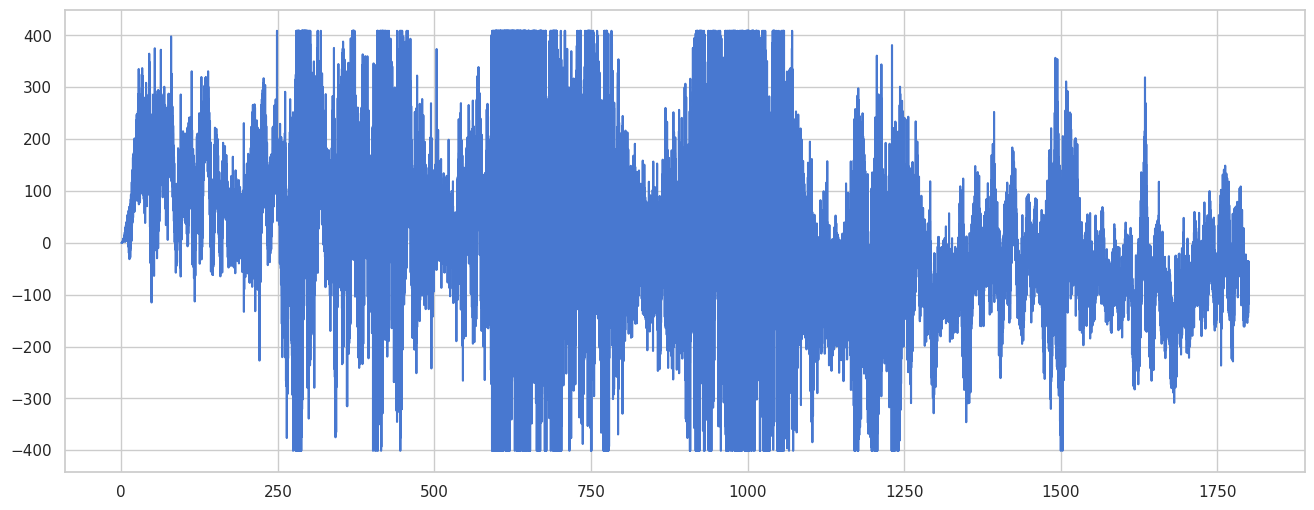

In [74]:
import matplotlib.pyplot as plt

# Read in time steps and velocities
csv_times = temp_0.iloc[:36000,0]
csv_data = temp_0.iloc[:36000,1]

plt.plot(csv_times, csv_data)
plt.show()

In [75]:
m_df = pd.concat([temp_0, temp_1], ignore_index=True)

m_df

,rel_time(sec),velocity(c/s)
0,0.00,0.000000
1,0.05,0.000503
2,0.10,0.003635
3,0.15,0.010198
4,0.20,0.028214
...,...,...
143995,3599.75,0.010700
143996,3599.80,0.006193
143997,3599.85,0.002047
143998,3599.90,0.000555


In [76]:
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)


<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;">Training Model using LSTM Autoencoder</h2>
    <p></p>
</div>


In [77]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.callbacks import EarlyStopping
import os
import pandas as pd


def trainModel():
    scalar = StandardScaler()

    scalar = scalar.fit(m_df[['velocity(c/s)']])  # scaler model

    model = Sequential()

    counter = 0

    for i in range(2):
        fileList = ['dataset_1', 'Dataset_2']
        train_filename = fileList[i]
        csv_directory = '/kaggle/input/martian-kriti/Martian/'

        filepath = os.path.join(csv_directory, train_filename + ".csv")

        temp_df = pd.read_csv(filepath)


        train = temp_df.rename(columns={'time(sec)': 'rel_time(sec)', 'velocity': 'velocity(c/s)'})

        train = train[['rel_time(sec)', 'velocity(c/s)']]

        #scaling
        
        train['velocity(c/s)'] = scalar.transform(train[['velocity(c/s)']])

        time_steps = 30
        X_train, y_train = create_sequences(train[['velocity(c/s)']], train['velocity(c/s)'], time_steps)

        timesteps = X_train.shape[1]
        num_features = X_train.shape[2]

        # Defining LSTM model architecture
        model.add(LSTM(128))
        model.add(Dropout(0.2))
        model.add(RepeatVector(timesteps))  # Repeats the input n times.
        model.add(LSTM(128, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(TimeDistributed(Dense(num_features)))  # Applying a layer to every temporal slice of an input.

        model.compile(loss='mae', optimizer='adam')

        # Early stopping callback
        early_stop = EarlyStopping(monitor='val_loss', patience=3, mode='min')
        history = model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.1, callbacks=[early_stop], shuffle=False)

        # Saving the model after training each part
        model.save(f'/kaggle/working/martian-kriti{counter}.h5')

        counter += 1
        currentindex = counter * 6

        # Freezing layers as required
        for layer in model.layers[:currentindex]:
            layer.trainable = False
    model.save('/kaggle/working/martian-kriti.h5')
    model.summary()

    return history, scalar


In [78]:
history, scalar = trainModel()

Epoch 1/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 63s 115ms/step - loss: 0.5976 - val_loss: 0.4036
Epoch 2/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 58s 114ms/step - loss: 0.5968 - val_loss: 0.3628
Epoch 3/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - loss: 0.5926 - val_loss: 0.3282
Epoch 4/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 58s 113ms/step - loss: 0.5926 - val_loss: 0.2978
Epoch 5/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - loss: 0.5886 - val_loss: 0.2800
Epoch 6/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - loss: 0.5874 - val_loss: 0.2843
Epoch 7/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - loss: 0.5879 - val_loss: 0.2707
Epoch 8/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 57s 112ms/step - loss: 0.5862 - val_loss: 0.2825
Epoch 9/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - loss: 0.5864 - val_loss: 0.2712
Epoch 10/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 57s 113ms/step - loss: 0.5869 - val_loss: 0.2706
Epoch 11/20
507/507 ━━━━━━━━━━━━━━━━━━━━ 58s 114ms/step - loss: 0.5851 - val_loss: 0.2770
Epoch 12/20
507/507

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_7 (RepeatVector)       │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 30, 1)               │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_8 (RepeatVector)       │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_8 (TimeDistributed) │ (None, 30, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 793,094 (3.03 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 396,546 (1.51 MB)

 Optimizer params: 396,548 (1.51 MB)

In [79]:
print(history.history)

{'loss': [0.4319508373737335, 0.42876020073890686, 0.4276260733604431, 0.42691677808761597, 0.42680713534355164, 0.4262616038322449, 0.4266599714756012, 0.4267234206199646, 0.4261963367462158, 0.4263581335544586, 0.4260443449020386, 0.42647817730903625, 0.42614060640335083, 0.4257625341415405], 'val_loss': [0.3171907961368561, 0.31743893027305603, 0.31363970041275024, 0.3148423731327057, 0.31380268931388855, 0.31213152408599854, 0.3111211359500885, 0.3100797235965729, 0.3098161518573761, 0.3122803568840027, 0.30693480372428894, 0.3075915277004242, 0.30943313241004944, 0.3087017238140106]}


In [80]:
print(scalar)

StandardScaler()


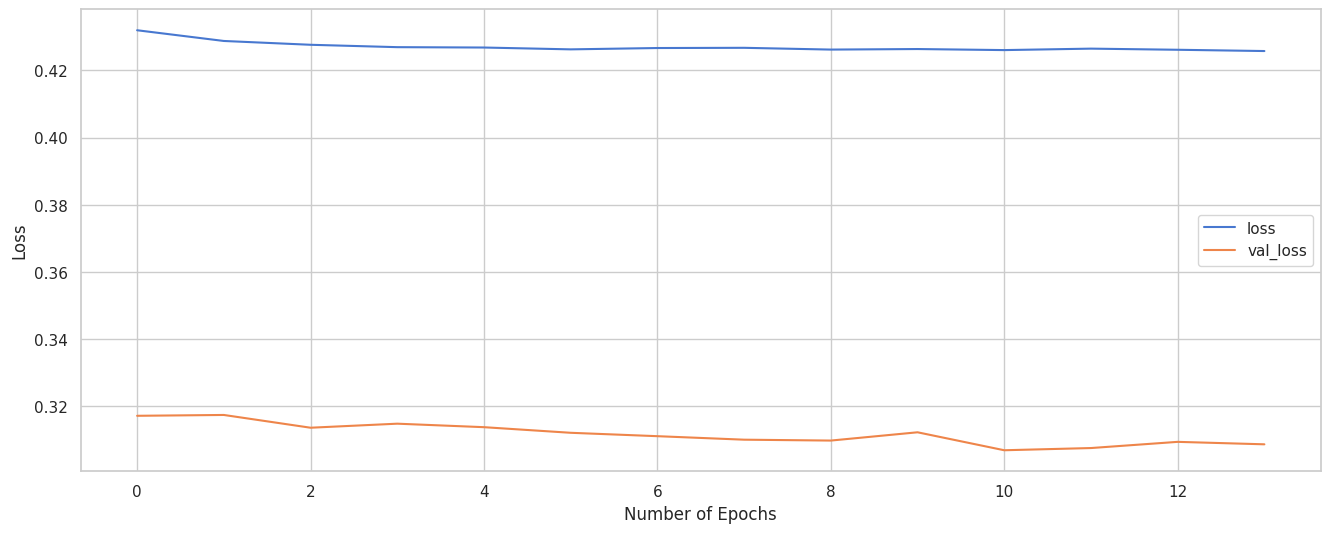

In [81]:
err = pd.DataFrame(history.history)
err.plot()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss');

In [82]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Model

from keras.src.legacy.saving import legacy_h5_format

model = legacy_h5_format.load_model_from_hdf5("/kaggle/working/martian-kriti.h5", custom_objects={'mae': 'mae'})

print(model)
print(model.summary())

<Sequential name=sequential_4, built=True>


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                       │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_7 (RepeatVector)       │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_15 (LSTM)                       │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 30, 1)               │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_16 (LSTM)                       │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector_8 (RepeatVector)       │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_17 (LSTM)                       │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_8 (TimeDistributed) │ (None, 30, 1)               │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 396,548 (1.51 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 396,546 (1.51 MB)

 Optimizer params: 2 (12.00 B)

None


In [83]:
history

<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;">Calculating Training Loss</h2>
    <p></p>
</div>


In [84]:
train_mae_loss_final = pd.DataFrame(columns=['Error'])

for i in range(2):
  fileList = ['dataset_1', 'Dataset_2']
  train_filename = fileList[i]
  csv_directory = '/kaggle/input/martian-kriti/Martian/'

  filepath = os.path.join(csv_directory + train_filename + ".csv")


  temp_df = pd.read_csv(filepath)

  train = temp_df.rename(columns={'time': 'rel_time(sec)', 'velocity': 'velocity(c/s)'})

  train = train[['rel_time(sec)', 'velocity(c/s)']]

  train['velocity(c/s)'] = scalar.transform(train[['velocity(c/s)']])

  time_steps = 30

  X_train, y_train = create_sequences(train[['velocity(c/s)']], train['velocity(c/s)'], time_steps)

  # Calculating the mae for training data
  X_train_pred = model.predict(X_train)
  train_mae_loss_final = pd.concat([train_mae_loss_final, pd.DataFrame(np.mean(np.abs(X_train_pred - X_train),axis=1),columns=['Error'])])

2250/2250 ━━━━━━━━━━━━━━━━━━━━ 85s 37ms/step
2250/2250 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step


In [85]:
train_mae_loss_final

,Error
0,0.033501
1,0.033457
2,0.033414
3,0.033328
4,0.033260
...,...
71965,0.032594
71966,0.032672
71967,0.032905
71968,0.033212


In [87]:
testDf = pd.DataFrame(train_mae_loss_final)
testDf.sort_values(by='Error', ascending=False)

,Error
13665,8.604729
13664,8.555820
13666,8.524030
13663,8.407098
13667,8.315843
...,...
71867,0.024579
71866,0.024197
71865,0.024194
71847,0.023641


<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;">Setting Threshold</h2>
    <p></p>
</div>


In [88]:
threshold = 6

if we notice a error > threshold, we will say that it is an anamoly

<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;">Test Dataset</h2>
    <p></p>
</div>


In [89]:
test = pd.read_csv("/kaggle/input/mars-seismic-velocity/mars/test/data/XB.ELYSE.02.BHV.2019-05-23HR02_evid0041.csv")

test['velocity(c/s)'] = scalar.transform(test[['velocity(c/s)']])

time_steps = 30

X_test, y_test = create_sequences(test[['velocity(c/s)']],test['velocity(c/s)'],time_steps)

X_test
y_test

array([-0.00246352, -0.00279021, -0.00134903, ...,  0.0011532 ,
        0.00114885,  0.00114729])

<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;">Calculating Mean Absolute error in Test Dataset</h2>
    <p></p>
</div>


In [90]:
X_test_pred = model.predict(X_test)
test_mae_loss = np.mean(np.abs(X_test_pred - X_test),axis=1)

2250/2250 ━━━━━━━━━━━━━━━━━━━━ 84s 37ms/step



<div style="background-color:#121212; color:#E0E0E0; padding:20px; border-radius:8px;font-family: 'Dancing Script', cursive;">
    <h2 style="color:#F1C40F;">Detecting Anomalies in the Test Data</h2>
    <p></p>
</div>


In [92]:
test_score_df = pd.DataFrame(test[time_steps:])
test_score_df['loss'] = test_mae_loss
test_score_df['threshold'] = threshold
test_score_df['anomaly'] = test_score_df['loss'] > test_score_df['threshold']
test_score_df['velocity(c/s)'] = test[time_steps:]['velocity(c/s)']

In [93]:
test_score_df.head()

,time(%Y-%m-%dT%H:%M:%S.%f),rel_time(sec),velocity(c/s),loss,threshold,anomaly
30,2019-05-23T02:00:01.532000,1.50,-0.002464,0.034740,6,False
31,2019-05-23T02:00:01.582000,1.55,-0.002790,0.034793,6,False
32,2019-05-23T02:00:01.632000,1.60,-0.001349,0.034819,6,False
33,2019-05-23T02:00:01.682000,1.65,-0.000199,0.034812,6,False
34,2019-05-23T02:00:01.732000,1.70,-0.003554,0.034797,6,False


In [94]:
test_score_df.to_csv('/kaggle/working/mars_seismic_velocity_scores.csv', index=False)


In [96]:
anomalies = test_score_df[test_score_df['anomaly']==True]
anomalies

,time(%Y-%m-%dT%H:%M:%S.%f),rel_time(sec),velocity(c/s),loss,threshold,anomaly
27994,2019-05-23T02:23:19.732000,1399.70,6.582999,6.001995,6,True
27995,2019-05-23T02:23:19.782000,1399.75,7.189274,6.015319,6,True
27996,2019-05-23T02:23:19.832000,1399.80,6.781137,6.063599,6,True
27997,2019-05-23T02:23:19.882000,1399.85,6.823184,6.110262,6,True
27998,2019-05-23T02:23:19.932000,1399.90,6.979275,6.136003,6,True
...,...,...,...,...,...,...
45933,2019-05-23T02:38:16.682000,2296.65,5.373254,6.700614,6,True
45934,2019-05-23T02:38:16.732000,2296.70,4.424900,6.587944,6,True
45935,2019-05-23T02:38:16.782000,2296.75,4.683033,6.440692,6,True
45936,2019-05-23T02:38:16.832000,2296.80,4.418955,6.302142,6,True


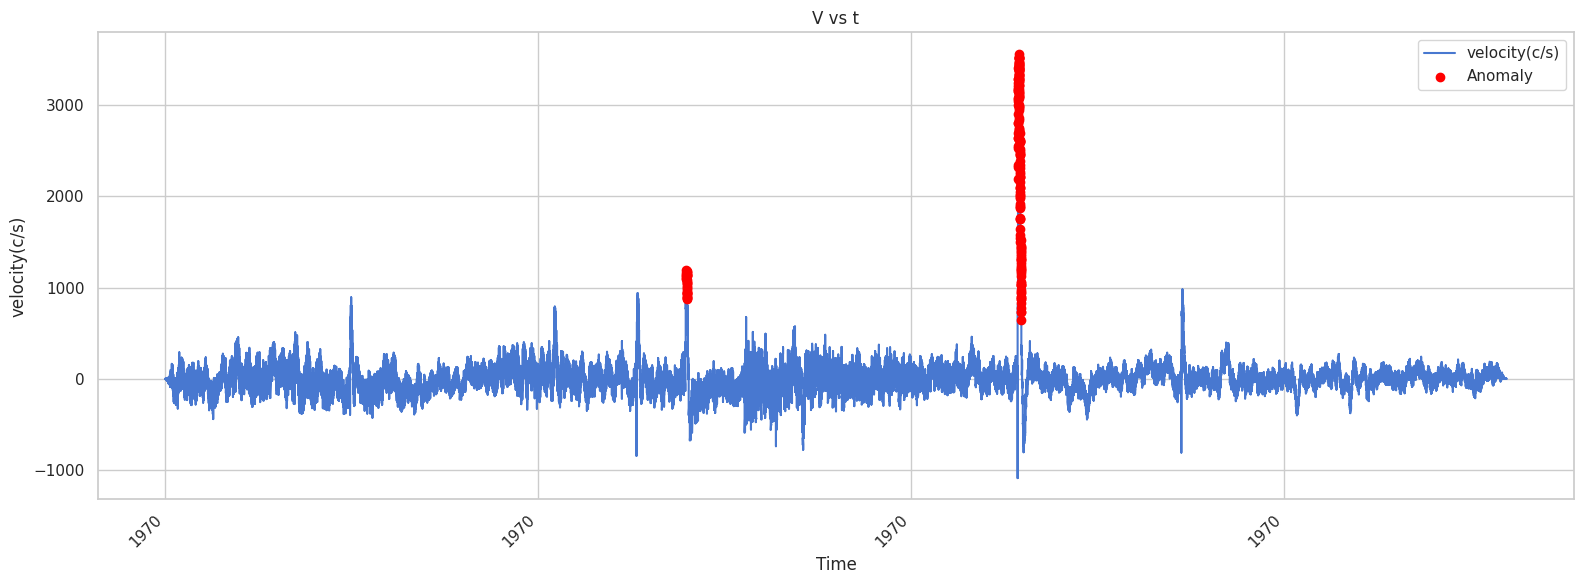

In [97]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

x1 = pd.to_datetime(test[time_steps:]['rel_time(sec)'])
x2 = pd.to_datetime(anomalies['rel_time(sec)'])

y1 = scalar.inverse_transform(test[time_steps:][['velocity(c/s)']])
y2 = scalar.inverse_transform(anomalies[['velocity(c/s)']])

fig, ax = plt.subplots()

ax.plot(x1, y1, label='velocity(c/s)', zorder=1)
ax.scatter(x2, y2, color='red', label='Anomaly', zorder=2)
plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

ax.set_xlabel('Time')
ax.set_ylabel('velocity(c/s)')
ax.set_title('V vs t')

ax.legend()
fig.tight_layout()
plt.show()